<a href="https://colab.research.google.com/github/IRISPHAM3112/aio-MD2/blob/main/M2_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#exe1: Length of a vector:
import numpy as np
def compute_vector_length(vector):
    len_of_vector = np.linalg.norm(vector)
    return len_of_vector
vector = np.array([2,3,4,5])
print(compute_vector_length(vector))
#exe1b Dot product
def compute_dot_product(v1,v2):
  dot_product = np.dot(v1,v2)
  return dot_product
v1 = np.array([1,2,3])
v2 = np.array([3,4,5])
compute_dot_product(v1,v2)
#exe1c multiplying a vector by a matrix
def matrix_multi_vector(matrix, vector):
  result = np.dot(matrix, vector)
  return result
matrix = np.array([[1,2],[3,4],[5,6]])
vector = np.array([2,3])
matrix_multi_vector(matrix, vector)
#exe1d Multiplying a matrix by a matrix
def matrix_multi_matrix(matrix1, matrix2):
  result = np.dot(matrix1, matrix2)
  return result
matrix1 = np.array([[1,2,3], [2,3,4]])
matrix2 = np.array([[1,2],[3,4], [5,6]])
matrix_multi_matrix(matrix1, matrix2)
#exe 1e matrix inverse
def matrix_inverse(matrix):
  det_A = np.linalg.det(A)
  if det_A !=0:
    A_inv = np.linalg.inv(A)
    return A_inv
  else:
    return 'Cant inverse'
A = np.array([[0.9,0.2],[0.1,0.8]])
matrix_inverse(A)

7.3484692283495345


array([[ 1.14285714, -0.28571429],
       [-0.14285714,  1.28571429]])

In [ ]:
#Exe2 Eigenvector and eigenvalue
def compute_eigenvectors_eigenvalues(matrix):
  eigenvalues , eigenvectors= np.linalg.eig(A)
  return eigenvalues, eigenvectors
A = np.array([[0.9,0.2],[0.1,0.8]])
compute_eigenvectors_eigenvalues(A)
# print(eigenvalues)
# print(eigenvector)

(array([1. , 0.7]),
 array([[ 0.89442719, -0.70710678],
        [ 0.4472136 ,  0.70710678]]))

In [ ]:
#Exe3 Cosine Similarity
x = np.array([1,2,3,4])
y = np.array([1,0,3,0])
def compute_cosine(x,y):
  dot_product = np.dot(x,y)
  norm_x = np.linalg.norm(x)
  norm_y = np.linalg.norm(y)
  similarity = dot_product/(norm_x * norm_y )
  return similarity

compute_cosine(x,y)

0.5773502691896257

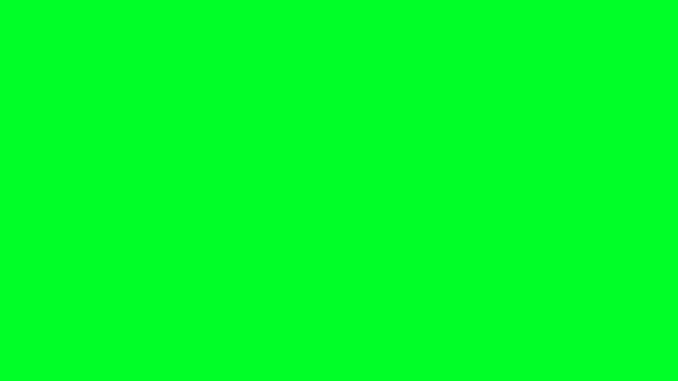

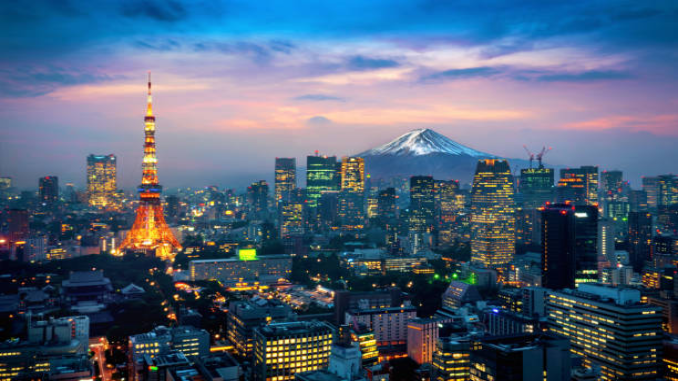

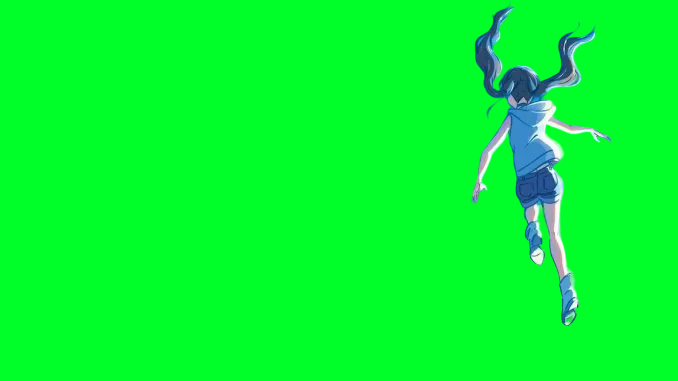

In [2]:
#Exe4 background subtraction
#Resize các ảnh về cùng một kích thước
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678,381))
ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image,(678,381))
bg2_image = cv2.imread('/content/NewBackground.jpg',1 )
bg2_image = cv2.resize(bg2_image,(678,381))
cv2_imshow(bg1_image)
cv2_imshow(bg2_image)
cv2_imshow(ob_image)
cv2.waitKey(0)  # 0 có nghĩa là chờ vô thời hạn
cv2.destroyAllWindows()

In [1]:
#Xây dựng hàm compute_different
def compute_different(bg_img, input_img):
  different_three_channel = cv2.absdiff(bg_img, input_img)
  different_single_channel = np.sum(different_three_channel, axis=2)/3.0
  different_single_channel = different_single_channel.astype('uint8')
  return different_single_channel

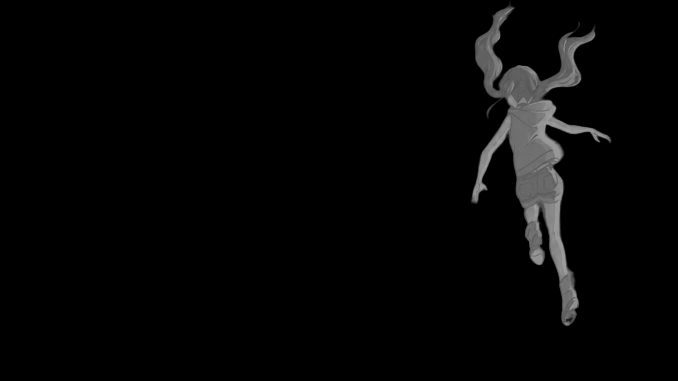

In [4]:
different_single_channel = compute_different(bg1_image, ob_image)
cv2_imshow(different_single_channel)

In [5]:
def compute_binary_mask(difference_single_channel):
  difference_binary = np.where(difference_single_channel >=15, 255,0)
  difference_binary = np.stack((difference_binary,)*3, axis = -1)
  return difference_binary

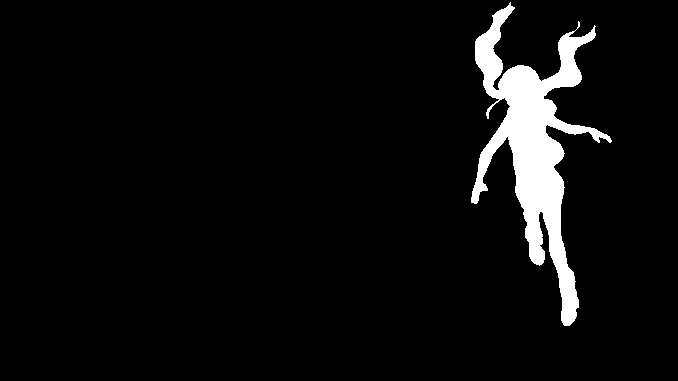

In [9]:
binary_mask = compute_binary_mask(different_single_channel)
cv2_imshow(binary_mask)

In [10]:
def replace_background(bg1_image, b2_image, ob_image):
  difference_single_channel = compute_different(bg1_image, ob_image)
  binary_mask = compute_binary_mask(difference_single_channel)
  output = np.where(binary_mask ==255, ob_image, bg2_image)
  return output


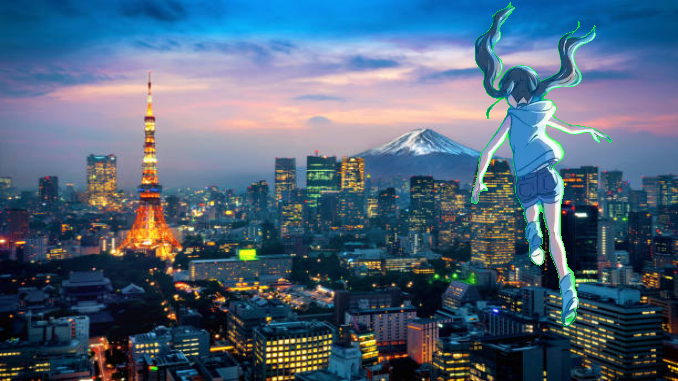

In [11]:
output = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(output)